In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head()
train.describe()
test.head()
test.describe()
train.info()
test.info()

train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   Ala      414 non-null    int64  
 6   Met      414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   Ala      276 non-null    int64  
 6   Met      276 non-null    float64
dtypes: float64(4),

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

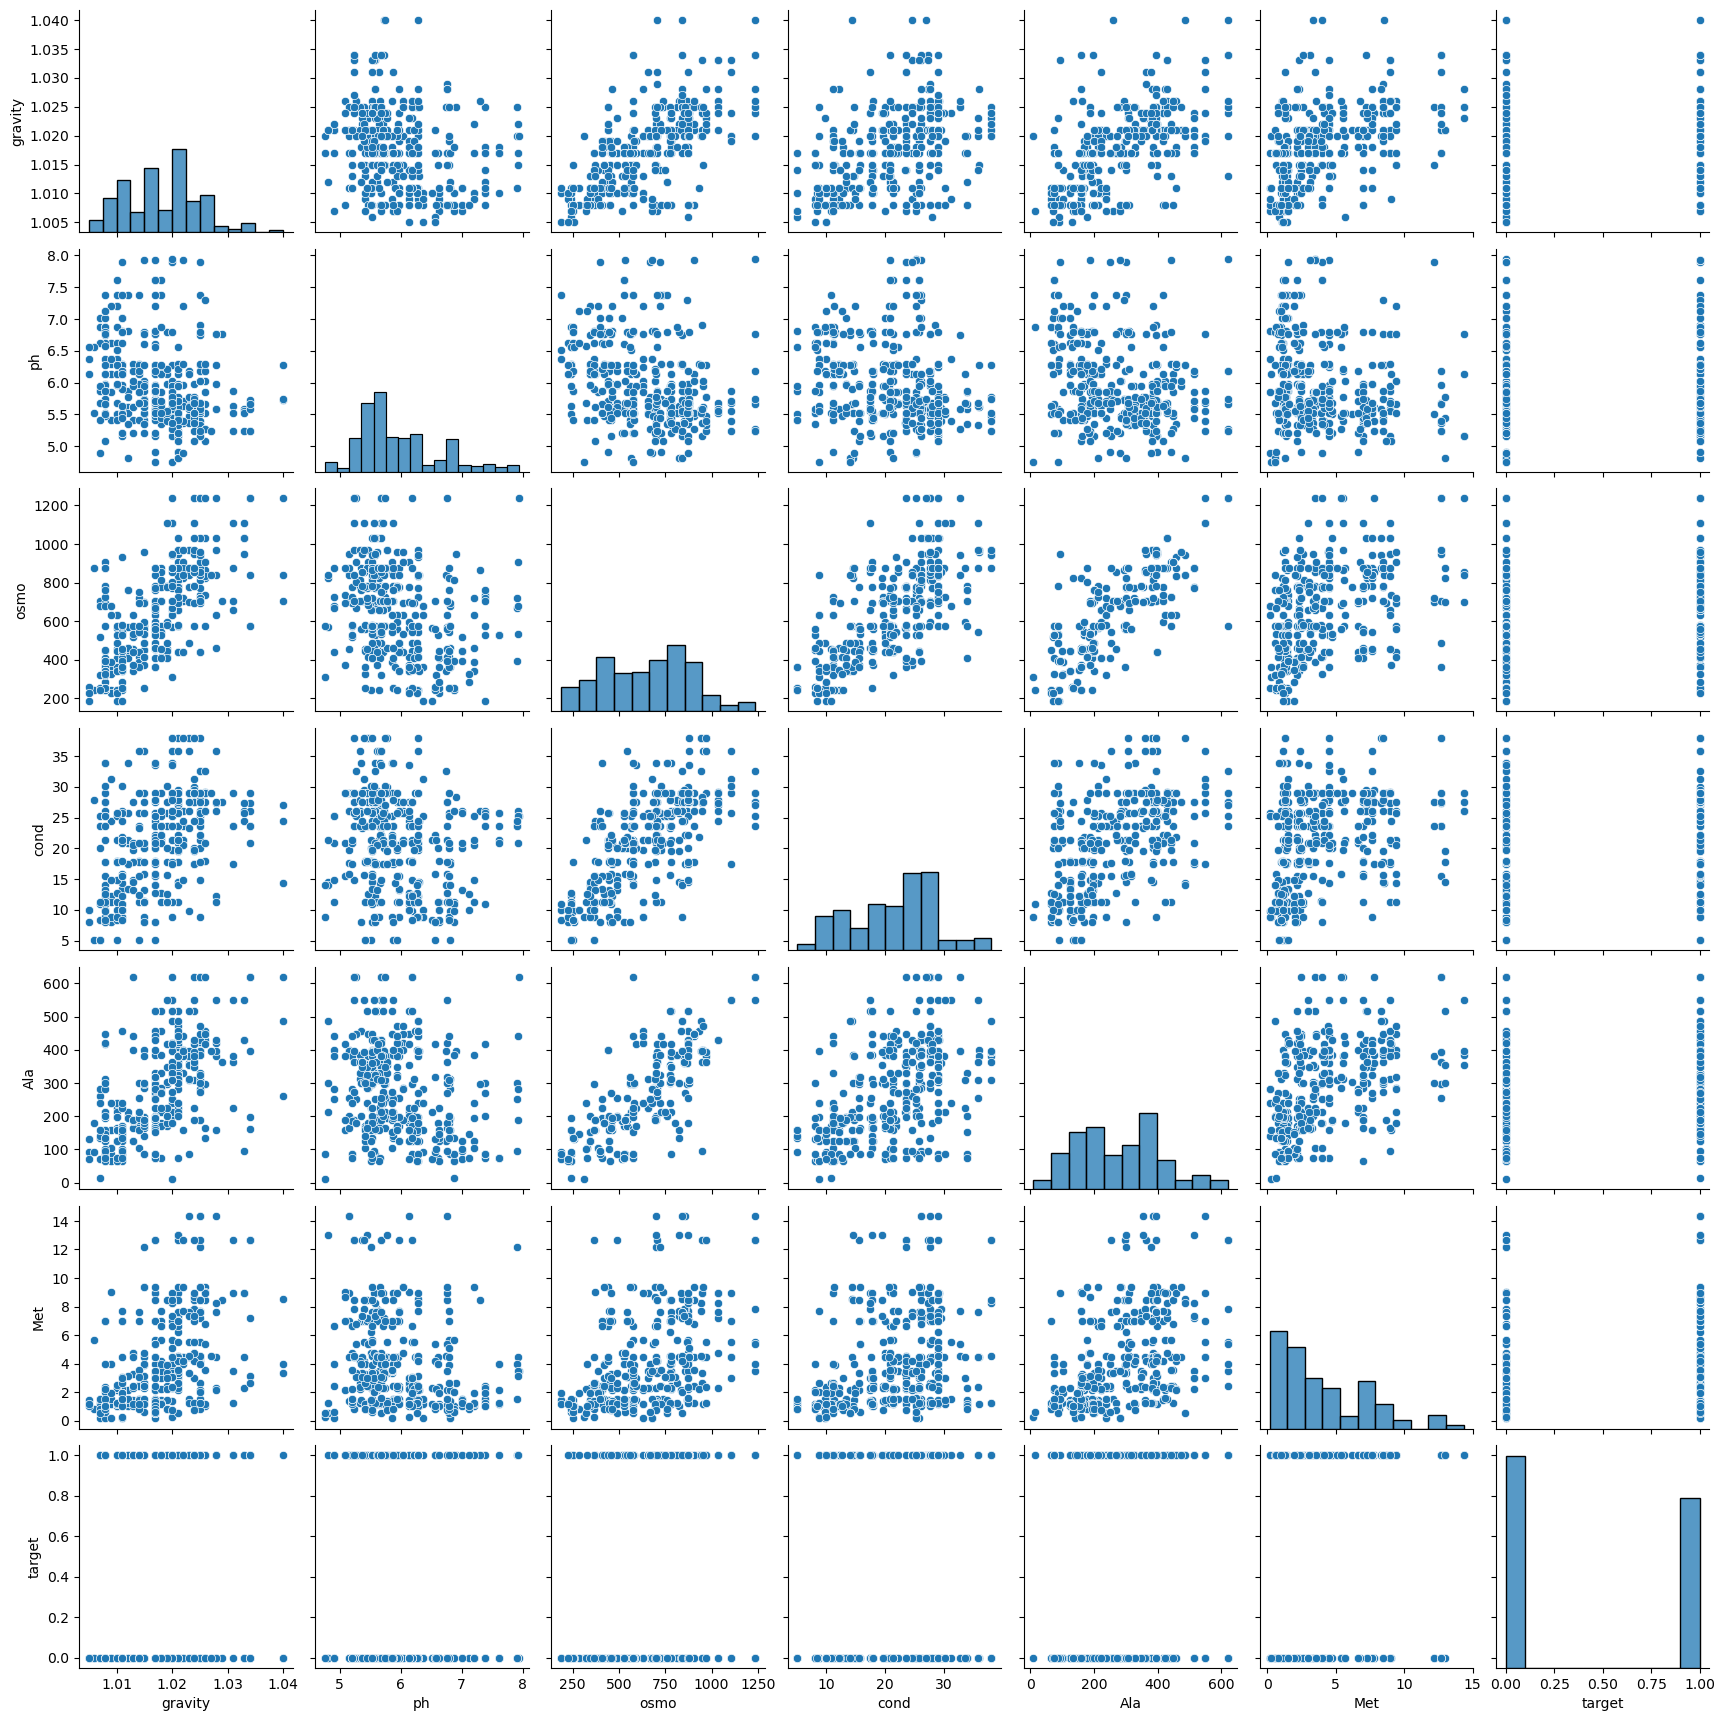

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

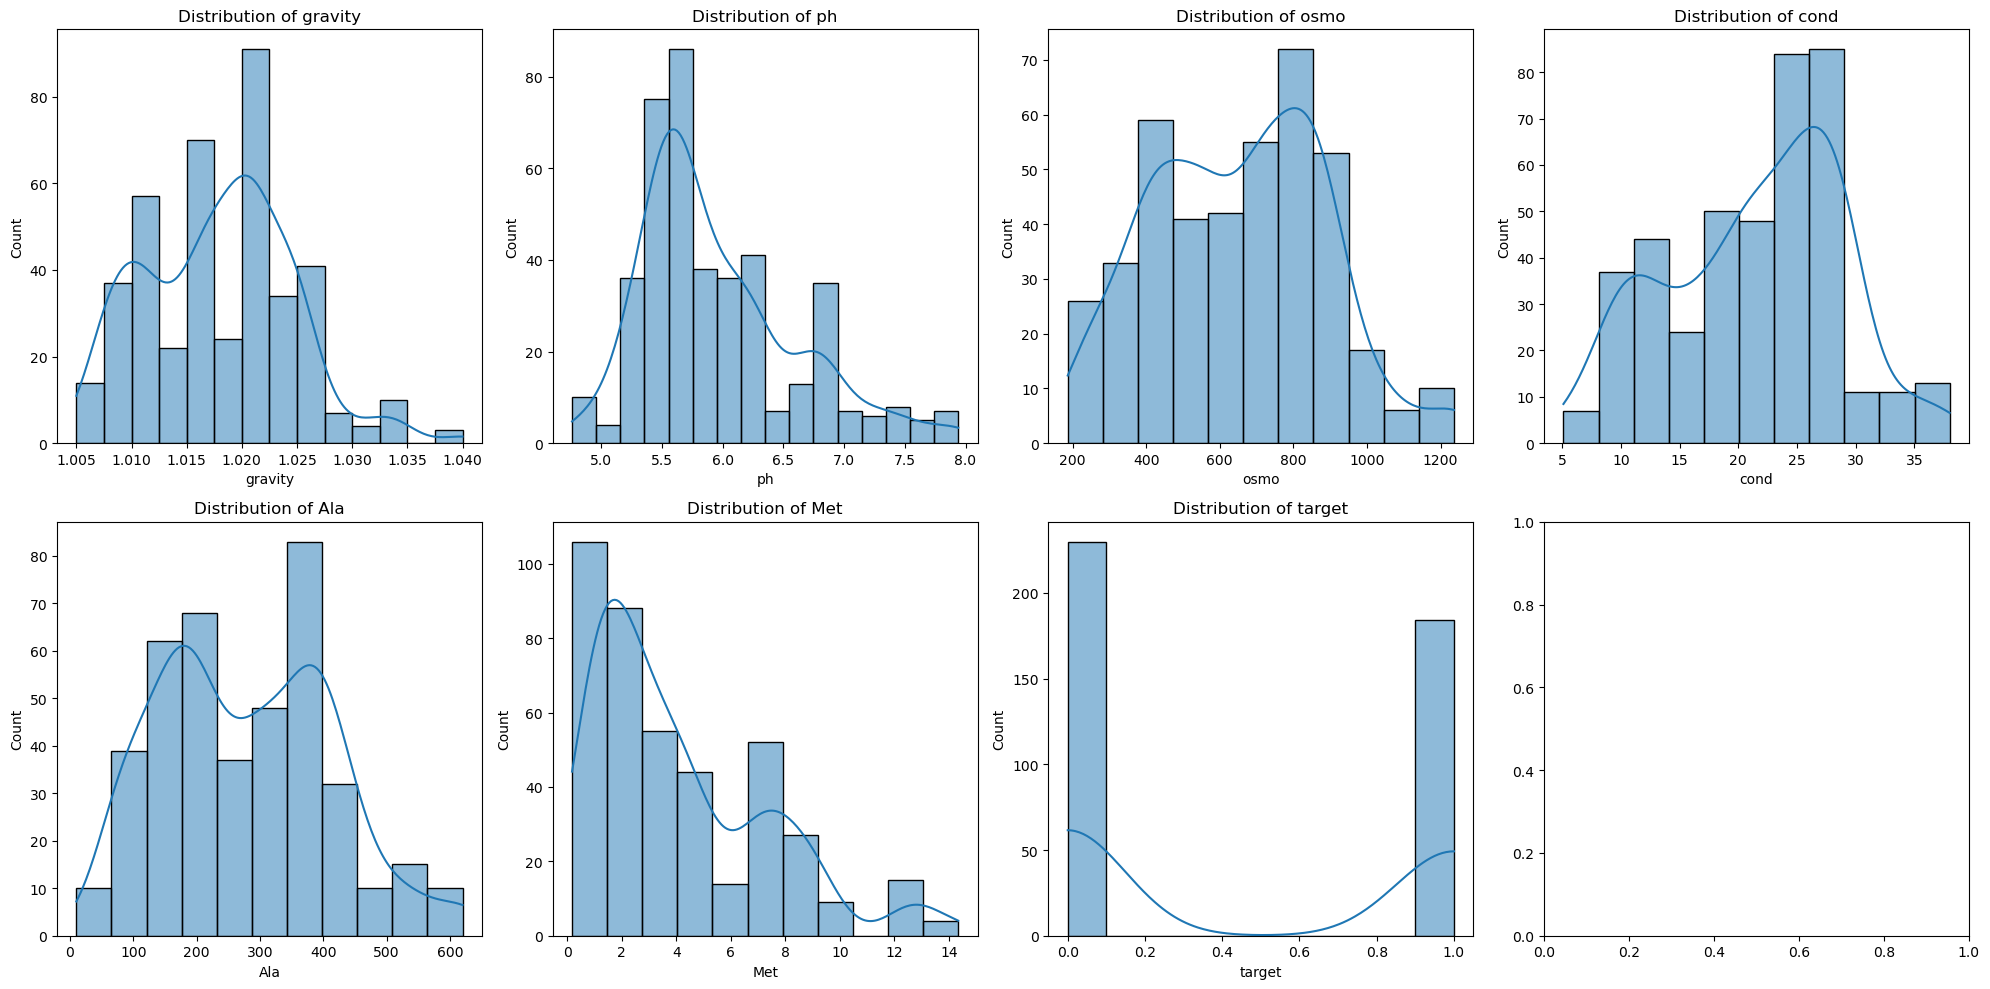

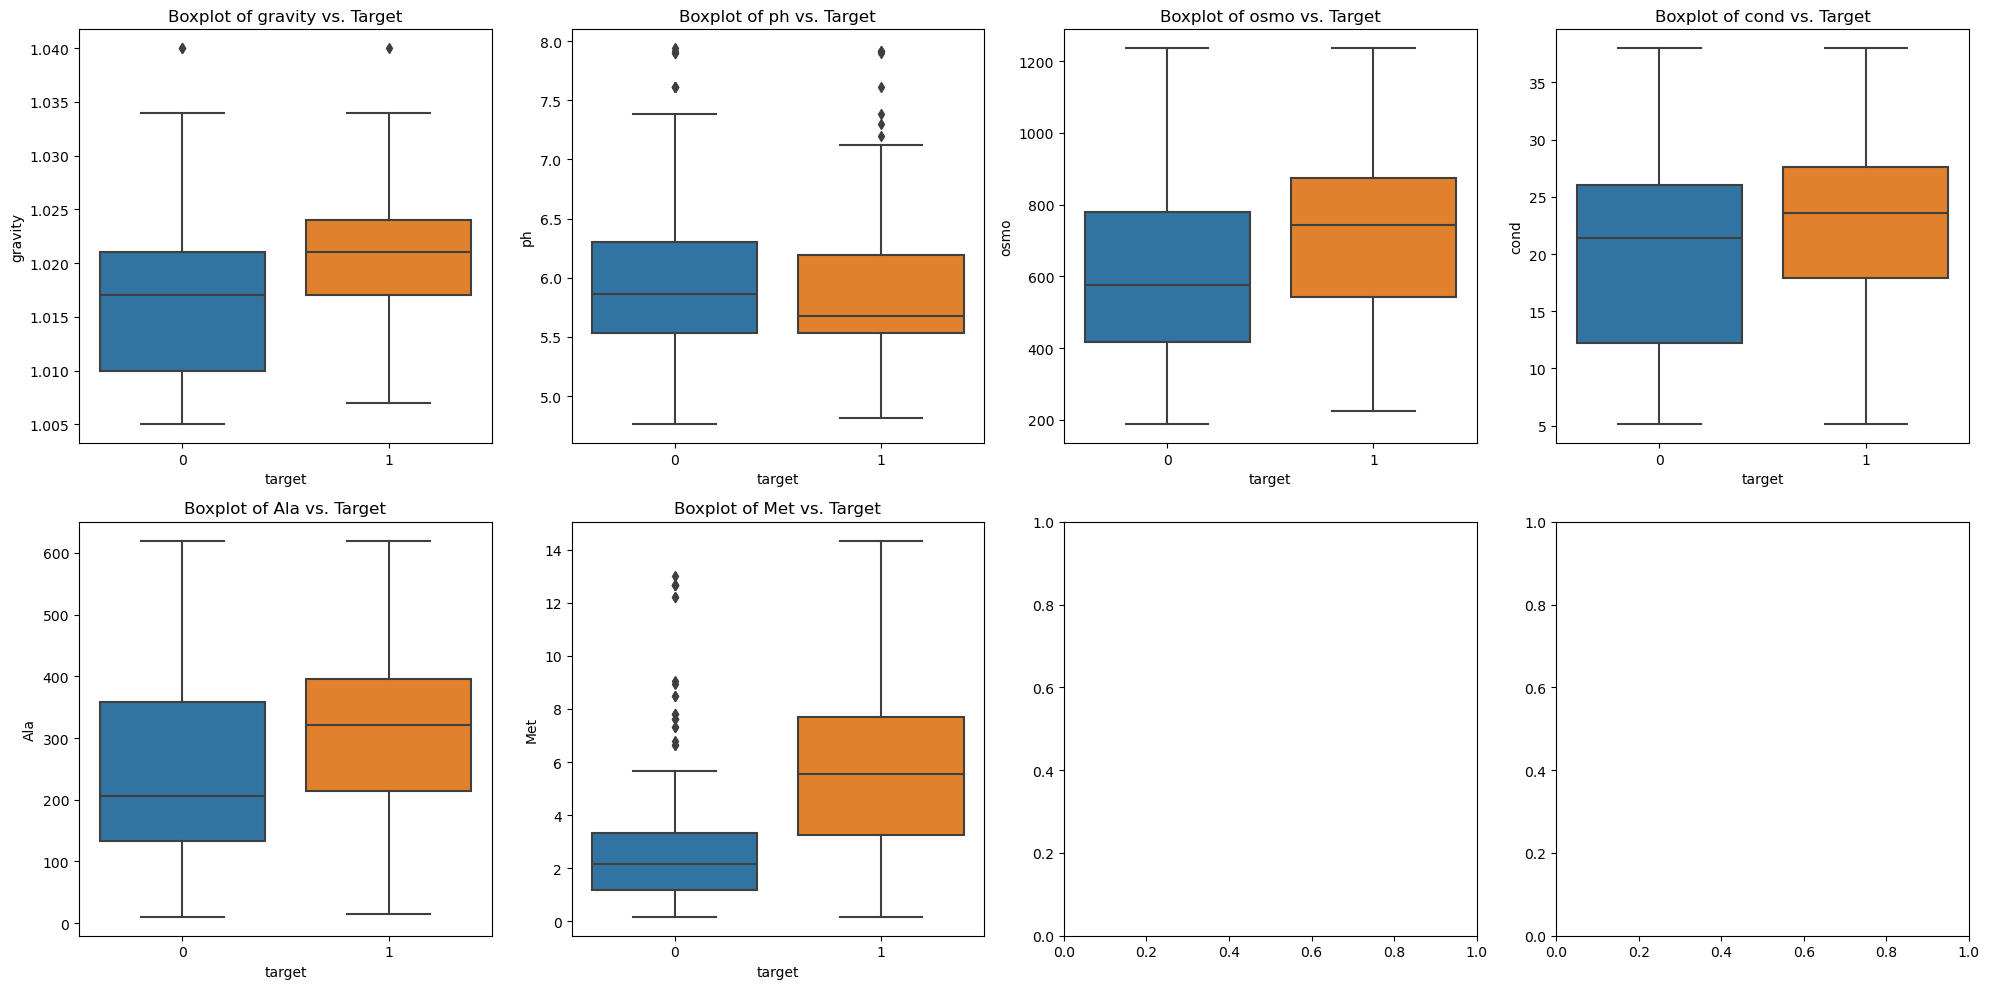

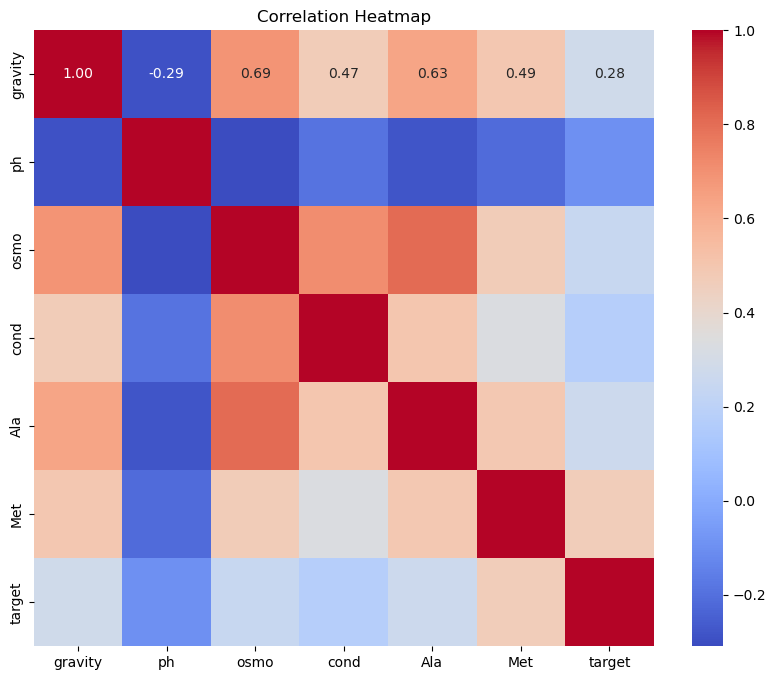

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


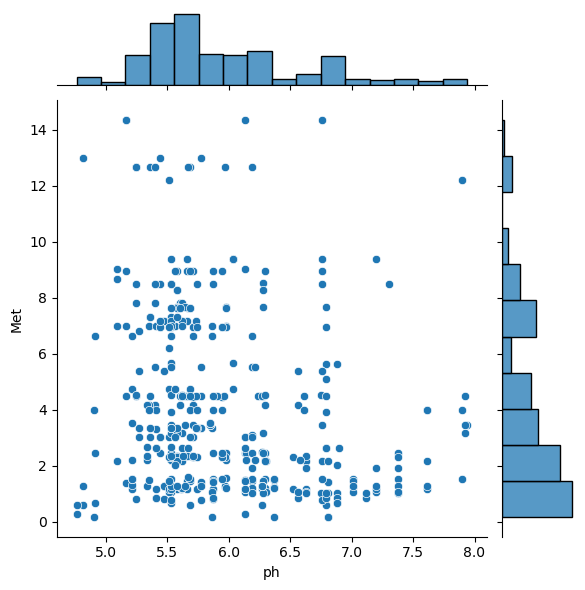

In [6]:
sns.pairplot(train[['gravity', 'ph', 'osmo', 'cond', 'Ala', 'Met', 'target']])
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, feature in enumerate(['gravity', 'ph', 'osmo', 'cond', 'Ala', 'Met', 'target']):
    sns.histplot(train[feature], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, feature in enumerate(['gravity', 'ph', 'osmo', 'cond', 'Ala', 'Met']):
    sns.boxplot(x='target', y=feature, data=train, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Boxplot of {feature} vs. Target')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(train[['gravity', 'ph', 'osmo', 'cond', 'Ala', 'Met', 'target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

sns.jointplot(x='ph', y='Met', data=train, kind='scatter')
plt.show()

In [7]:
columns_to_winsorize = ['gravity', 'ph', 'osmo', 'cond', 'Ala', 'Met']
for column in columns_to_winsorize:
    train[column] = winsorize(train[column], limits=[0.05, 0.05])

train['total_prop']=train['osmo']+train['cond']+train['Ala']+train['Met']
test['total_prop']=test['osmo']+test['cond']+test['Ala']+test['Met']

X=train.drop(['target'], axis=1)
y=train['target']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}

params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
}

best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    clf = GridSearchCV(model, params[name], scoring='roc_auc', cv=5, verbose=2)
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_
    print(f"Best parameters for {name}: {clf.best_params_}")

for name, model in best_models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

y_pred_rf=best_models['Random Forest'].predict(test)
y_pred_xgb=best_models['XGBoost'].predict(test)
y_pred_logistic=best_models['Logistic Regression'].predict(test)

submission_rf=pd.DataFrame({'id': test['id'], 'target': y_pred_rf})
submission_xgb=pd.DataFrame({'id': test['id'], 'target': y_pred_xgb})
submission_logistic=pd.DataFrame({'id': test['id'], 'target': y_pred_logistic})

submission_rf.to_csv('submission_rf.csv', index=False)
submission_xgb.to_csv('submission_xgb.csv', index=False)
submission_logistic.to_csv('submission_logistic.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.1s
[CV] END ...................